
  ****READING THE DATA


In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.model_selection import RandomizedSearchCV 

In [2]:
x = r"C:\Users\zaxak\Desktop\λερι.csv"
df = pd.read_csv(x,sep=';')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,"56,95","1889,5",0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,"53,85","108,15",0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,"70,7","151,65",0,0,Yes


>DATA CLEAN




FEATURE ENGINEERING

In [3]:
# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == 'object')

# Get list of categorical column names
categorical_columns = df.columns[categorical_mask].tolist()

# Print the head of the categorical columns
print(df[categorical_columns].head())

# Create LabelEncoder object: le
le = LabelEncoder()
# Apply LabelEncoder to categorical columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: le.fit_transform(x))

# Print the head of the LabelEncoded categorical columns
print(df[categorical_columns].head())


   customerID  gender Partner Dependents PhoneService     MultipleLines  \
0  7590-VHVEG  Female     Yes         No           No  No phone service   
1  5575-GNVDE    Male      No         No          Yes                No   
2  3668-QPYBK    Male      No         No          Yes                No   
3  7795-CFOCW    Male      No         No           No  No phone service   
4  9237-HQITU  Female      No         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No 

DATA SPLIT

In [4]:
# Target variable (y): Select the column you want to predict
y = df['Churn']

# Features (X): Select all other columns by dropping the target variable
X = df.drop('Churn', axis=1)

In [5]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:
from sklearn.preprocessing import StandardScaler

# 1. CRITICAL: SAVE the original column names BEFORE scaling
original_columns = X_train.columns

scaler = StandardScaler()

# 2. Fit and transform the training data
# This results in a NumPy array.
X_train_scaled_array = scaler.fit_transform(X_train)

# 3. Convert the scaled array back to a DataFrame, 
#    re-applying the original column names
X_train = pd.DataFrame(X_train_scaled_array, columns=original_columns)

# 4. Transform X_test using the same fitted scaler
X_test_scaled_array = scaler.transform(X_test)

# 5. Convert X_test back to a DataFrame (assuming X_test also needs column names)
#    Note: X_test's original columns should be the same as X_train's
X_test = pd.DataFrame(X_test_scaled_array, columns=original_columns)

# X_train and X_test are now scaled DataFrames with their column names intact.


****MODEL CREATION*******

In [7]:
#RANDOM FOREST CLASSIFIER
rf_model = RandomForestClassifier(random_state=42).fit(
  X_train, y_train)

# Use it to predict the labels of the test data
rf_predictions = rf_model.predict(X_test)
y_probalities_RF = rf_model.predict_proba(X_test)
y_probs_rf = y_probalities_RF[:, 1]


In [8]:
Accur_rf=accuracy_score(y_test,rf_predictions)
print('Accuracy:',f"{Accur_rf:.2f}")

f1_f=f1_score(y_test,rf_predictions)
print('f1:',f"{f1_f:.2f}")
print(confusion_matrix(y_test,rf_predictions))
recal_rf=recall_score(y_test,rf_predictions)
print('recall:',f"{recal_rf:.2f}")
prec_rf=precision_score(y_test,rf_predictions)
print('precicion:',f"{prec_rf:.2f}")

AUC1_RF=roc_auc_score(y_test,y_probs_rf)
print('AUC:',f"{AUC1_RF:.2f}")


Accuracy: 0.85
f1: 0.70
[[964  71]
 [137 237]]
recall: 0.63
precicion: 0.77
AUC: 0.92


In [9]:
#SVM
svc_model = SVC(random_state=42, probability=True)
svc_model.fit(X_train, y_train)

# Get predictions and probabilities
svc_predictions = svc_model.predict(X_test)
svc_probabilities = svc_model.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

# Evaluate Baseline Performance
print("--- SVC BASELINE METRICS (Default Settings) ---")
Acc_sv= accuracy_score(y_test, svc_predictions)
print('Accuracy:',f"{Acc_sv:.2f}")
f1_svm= f1_score(y_test, svc_predictions)
print('f1:',f"{f1_svm:.2f}")

AUC_SVM= roc_auc_score(y_test, svc_probabilities)
print('AUC:',f"{AUC_SVM:.2f}")


Recall_svm= recall_score(y_test, svc_predictions)
print('recall:',f"{Recall_svm:.2f}")

Precicion_svm=precision_score(y_test, svc_predictions)
print('precicion:',f"{Precicion_svm:.2f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, svc_predictions))


--- SVC BASELINE METRICS (Default Settings) ---
Accuracy: 0.85
f1: 0.70
AUC: 0.91
recall: 0.64
precicion: 0.76
Confusion Matrix:
 [[958  77]
 [133 241]]


In [10]:
#LOGISTIC REGRESIION
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression().fit(X_train,y_train)
log_preds=log_reg.predict(X_test)
y_probalities_log = log_reg.predict_proba(X_test)
y_probs_log = y_probalities_log[:, 1]

In [11]:
AC_log=accuracy_score(y_test,log_preds)
print('accuracy:',f"{AC_log:.2f}")
f1_log=f1_score(y_test,log_preds)
print('f1:',f"{f1_log:.2f}")
recalllog=recall_score(y_test,log_preds)
print('recall:',f"{recalllog:.2f}")
precicion_log=precision_score(y_test,log_preds)
print('precicion:',f"{precicion_log:.2f}")
auc_lo=roc_auc_score(y_test,y_probs_log)
print('auc:',f"{auc_lo:.2f}")
print(confusion_matrix(y_test,log_preds))

accuracy: 0.85
f1: 0.71
recall: 0.69
precicion: 0.74
auc: 0.92
[[945  90]
 [116 258]]


In [12]:
#KNN
import matplotlib.pyplot as plt
from sklearn.neighbors  import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train,y_train)
knn_predicts=knn.predict(X_test)
y_probalities_knn = knn.predict_proba(X_test)
y_probs_knn = y_probalities_knn[:, 1]

In [13]:
Accur_KNN=accuracy_score(y_test,knn_predicts)
print('Accuracy:',f"{Accur_KNN:.2f}")

F1_KNN=f1_score(y_test,knn_predicts)
print('f1:' ,f"{F1_KNN:.2f}")

Recall_knn=recall_score(y_test,knn_predicts)
print('Recall:',f"{Recall_knn:.2f}")

Prec_KNN=precision_score(y_test,knn_predicts)
print('precicion:',f"{Prec_KNN:.2f}")
Auc_knn=roc_auc_score(y_test,y_probs_knn)
print('Auc:',f"{Auc_knn:.2f}")

print(confusion_matrix(y_test,knn_predicts))

Accuracy: 0.81
f1: 0.63
Recall: 0.61
precicion: 0.65
Auc: 0.85
[[913 122]
 [144 230]]


In [14]:
#DECISION TREE
Dec_Tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
predictions=Dec_Tree.predict(X_test)
y_probalities_dec = Dec_Tree.predict_proba(X_test)
y_probs_dec = y_probalities_dec[:, 1]

In [15]:
Accuracy_dc=accuracy_score(y_test,predictions)
print('Accuracy:',f"{Accuracy_dc:.2f}")


f1_dc=f1_score(y_test,predictions)
print('f1:',f"{f1_dc:.2f}")


Recall_dc=recall_score(y_test,predictions)
print('Recall:',f"{Recall_dc:.2f}")

Prec_dc=precision_score(y_test,predictions)
print('precicion:',f"{Prec_dc:.2f}")

Aux=roc_auc_score(y_test,y_probs_dec)
print('Auc:',f"{Aux:.2f}")

print(confusion_matrix(y_test,predictions))

Accuracy: 0.81
f1: 0.66
Recall: 0.67
precicion: 0.65
Auc: 0.77
[[899 136]
 [125 249]]


In [16]:
#XGBOOST
from xgboost import XGBClassifier
Xgboost=XGBClassifier(random_state=42).fit(X_train,y_train)
Xg_preds=Xgboost.predict(X_test)
y_probalities_xg = Xgboost.predict_proba(X_test)
y_probs_xg = y_probalities_xg[:, 1]

In [17]:
xg_ac=accuracy_score(y_test,Xg_preds)
print('accuracy:',f"{xg_ac:.2f}")

f1_xg=f1_score(y_test,Xg_preds)
print('f1:',f"{f1_xg:.2f}")


Recall_xg=recall_score(y_test,Xg_preds)
print('Recall:',f"{Recall_xg:.2f}")

PREC_XG=precision_score(y_test,Xg_preds)
print('precicion:',f"{PREC_XG:.2f}")


AUC_XG=roc_auc_score(y_test,y_probs_xg)
print('AUC:',f"{AUC_XG:.2f}")

print(confusion_matrix(y_test,Xg_preds))

accuracy: 0.85
f1: 0.71
Recall: 0.69
precicion: 0.74
AUC: 0.92
[[943  92]
 [115 259]]


#*****************HYPERPARAMETERS

In [18]:
#What are the hyperparameters for each model ?
#KNN
print('KNN:',knn.get_params().keys())
#RANDOM FOREST CLASSIFIER
print('Random Forest:',rf_model.get_params().keys())
print('Decision Tree:',Dec_Tree.get_params().keys())
print('Xgboost',Xgboost.get_params().keys())
print('Logistic regression:',log_reg.get_params().keys())
print('SVM:',svc_model.get_params().keys())

KNN: dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
Random Forest: dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])
Decision Tree: dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'random_state', 'splitter'])
Xgboost dict_keys(['objective', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'device', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'feature_types', 'feature_weights', 'gamma', 'grow_policy', 'importance_type', 'interaction_cons

DECISION TREE TUNING


In [19]:
#GRIDSEARCH FOR DECICION TREE

param_grid_DCT={'criterion' : ["gini", "entropy",'log_loss'],
               'max_depth' : [None, 5, 10, 20],
               'max_features' : ['sqrt','log2'],
               'min_samples_leaf' : [1,5,10,20],
               'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1],
               'class_weight': ['balanced',  None],
               'max_leaf_nodes': [5, 10, 20, 50, 100],
               'min_impurity_decrease' : [0.0, 0.0005, 0.005, 0.01, 0.05],
               'min_samples_split': [2, 5, 10, 20, 50],
               'min_weight_fraction_leaf': [0.0, 0.001, 0.005, 0.01]
            }
                
random_search_DC = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, ), 
    param_distributions=param_grid_DCT,
    n_iter=100, 
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    error_score='raise' 
)
random_search_DC.fit(X_train, y_train)
print("--- RandomizedSearchCV Best Parameters ---")
print(random_search_DC.best_params_)

--- RandomizedSearchCV Best Parameters ---
{'min_weight_fraction_leaf': 0.01, 'min_samples_split': 5, 'min_samples_leaf': 20, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.0001}


In [50]:
best_params = {'min_weight_fraction_leaf': 0.01, 'min_samples_split': 5, 'min_samples_leaf': 20, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': 20, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.0001}



Dec_Tree_tuned=DecisionTreeClassifier(**best_params)

Dec_Tree_tuned.fit(X_train,y_train)
predict=Dec_Tree_tuned.predict(X_test)

y_proba_all_dec = Dec_Tree_tuned.predict_proba(X_test)
y_scores_dec = y_proba_all_dec[:, 1]


In [51]:
Accuracy_dc1=accuracy_score(y_test,predict)
print('Accuracy:',f"{Accuracy_dc1:.2f}")


f1_dc1=f1_score(y_test,predict)
print('f1:',f"{f1_dc1:.2f}")


Recall_dc1=recall_score(y_test,predict)
print('Recall:',f"{Recall_dc1:.2f}")

Prec_dc1=precision_score(y_test,predict)
print('precicion:',f"{Prec_dc1:.2f}")

Aux1=roc_auc_score(y_test,y_scores_dec)
print('Auc:',f"{Aux1:.2f}")

print(confusion_matrix(y_test,predict))

Accuracy: 0.81
f1: 0.59
Recall: 0.52
precicion: 0.69
Auc: 0.85
[[948  87]
 [179 195]]


*KNN TUNING and complexity visualization


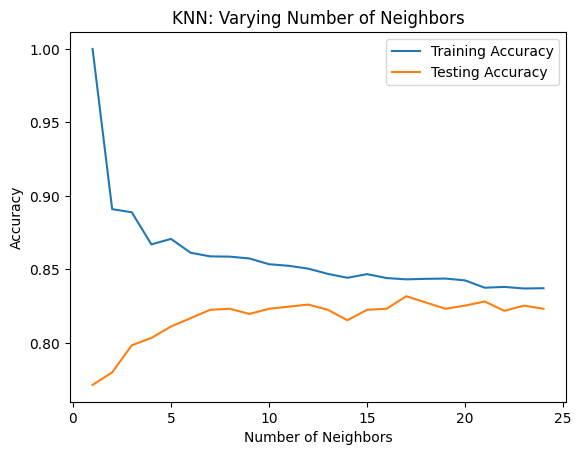

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
 {np.int64(1): 1.0, np.int64(2): 0.8910188143414981, np.int64(3): 0.8888888888888888, np.int64(4): 0.867057152999645, np.int64(5): 0.870784522541711, np.int64(6): 0.8613773517926873, np.int64(7): 0.8588924387646433, np.int64(8): 0.8587149449769258, np.int64(9): 0.8574724884629038, np.int64(10): 0.8535676251331203, np.int64(11): 0.8525026624068157, np.int64(12): 0.850550230741924, np.int64(13): 0.8470003549875754, np.int64(14): 0.844337948171814, np.int64(15): 0.8468228611998581, np.int64(16): 0.8441604543840966, np.int64(17): 0.8432729854455094, np.int64(18): 0.8436279730209443, np.int64(19): 0.8438054668086616, np.int64(20): 0.8425630102946396, np.int64(21): 0.8375931842385517, np.int64(22): 0.838125665601704, np.int64(23): 0.8370607028753994, np.int64(24): 0.8372381966631168} 
 {np.int64(1): 0.7714691270404542, np.int64(2): 0.7799858055358411, np.int64(3): 0.7984386089425124, np.int64(4): 0.8034066713981547, n

In [22]:
neighbors = np.arange(1, 25)
train_accuracies = {}
test_accuracies = {}
for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor).fit(X_train,y_train)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)


# PLOT MODEL COMPLEXITY
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)


In [23]:
# Find the key corresponding to the maximum value
best_key = max(test_accuracies, key=test_accuracies.get)
best_value = test_accuracies[best_key]

print(f"K={best_key} is the best value for the hyperparameter 'n_neighbors', to maximize accuracy ")
print(f"Highest value: {best_value:.2f}")


K=17 is the best value for the hyperparameter 'n_neighbors', to maximize accuracy 
Highest value: 0.83


In [48]:
best_knn_params={
 'n_neighbors': 17}
Tuned_KNN=KNeighborsClassifier(**best_knn_params)
Tuned_KNN.fit(X_train,y_train)
KNN_predictionS=Tuned_KNN.predict(X_test)
y_proba_all_KNN = Tuned_KNN.predict_proba(X_test)
y_scores_KNN = y_proba_all_KNN[:, 1]

In [49]:
Accur_KNN11=accuracy_score(y_test,KNN_predictionS)
print('Accuracy:',f"{Accur_KNN11:.2f}")

F1_KNN1=f1_score(y_test,KNN_predictionS)
print('f1:' ,f"{F1_KNN1:.2f}")

Recall_knn1=recall_score(y_test,KNN_predictionS)
print('Recall:',f"{Recall_knn1:.2f}")

Prec_KNN1=precision_score(y_test,KNN_predictionS)
print('precicion:',f"{Prec_KNN1:.2f}")
Auc_knn1=roc_auc_score(y_test,y_scores_KNN)
print('Auc:',f"{Auc_knn1:.2f}")

print(confusion_matrix(y_test,KNN_predictionS))

Accuracy: 0.83
f1: 0.66
Recall: 0.61
precicion: 0.71
Auc: 0.88
[[943  92]
 [145 229]]


**RANDOMFOREST TUNE


In [26]:
# RANDOM FOREST TUNIN

param_grid_RF = {'n_estimators': range(10, 50, 10),
              'criterion' : ["gini", "entropy",'log_loss'],
               'max_depth' : [None, 5, 10, 20],
               'bootstrap' : [True, False],
               'min_samples_split' : [2,5,10,20],
               'min_samples_leaf' : [1,5,10,20],
               'max_features':['sqrt', 'log2',0.5,0.8],
               'class_weight': ['balanced',None],
               'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1],
               'min_impurity_decrease': [0.0, 0.0001, 0.001, 0.01, 0.1]
            }

random_search_RF = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42), 
    param_distributions=param_grid_RF,
    n_iter=100,  # Number of parameter settings that are sampled
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,error_score='raise' # Set a random state for reproducibility
)
random_search_RF.fit(X_train, y_train)

print("--- RandomizedSearchCV Best Parameters ---")
print(random_search_RF.best_params_)


--- RandomizedSearchCV Best Parameters ---
{'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.001, 'max_features': 0.8, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None, 'ccp_alpha': 0.0001, 'bootstrap': True}


In [46]:
best_rf_params={'n_estimators': 30, 'min_samples_split': 5, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.001, 'max_features': 0.8, 'max_depth': 10, 'criterion': 'entropy', 'class_weight': None, 'ccp_alpha': 0.0001, 'bootstrap': True}





Tuned_RF=RandomForestClassifier(**best_rf_params,random_state=42,n_jobs=-1)
Tuned_RF.fit(X_train,y_train)
rf_tuned_predictions=Tuned_RF.predict(X_test)
y_proba_all_RF = Tuned_RF.predict_proba(X_test)
y_scores_RF = y_proba_all_RF[:, 1]

In [47]:
accuracy_rf = accuracy_score(y_test, rf_tuned_predictions)
print('Accuracy:',f"{accuracy_rf:.2f}")
F1_SCORE_RF=f1_score(y_test,rf_tuned_predictions)
print('f1:',f"{F1_SCORE_RF:.2f}")

print(confusion_matrix(y_test,rf_tuned_predictions))

recall_rf=recall_score(y_test,rf_tuned_predictions)
print('Recall:',f"{recall_rf:.2f}")

prec_rf1= precision_score(y_test,rf_tuned_predictions)
print('Precicion:',f"{prec_rf1:.2f}")


auc_rf1=roc_auc_score(y_test,y_scores_RF)
print('AUC:',f"{auc_rf1:.2f}")



Accuracy: 0.86
f1: 0.71
[[961  74]
 [128 246]]
Recall: 0.66
Precicion: 0.77
AUC: 0.93


*LOG REGRESSION TUNE


In [29]:
param_grid_lg ={
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000], 
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
   
   
grid_search_lg = GridSearchCV(LogisticRegression(solver='liblinear'),
    param_grid_lg,
    scoring='accuracy',
    cv=5,                 # Use 5-fold cross-validation
    verbose=1,
    n_jobs=-1          # Use all available CPU cores
)
grid_search_lg.fit(X_train, y_train)
grid_search_lg.best_params_


Fitting 5 folds for each of 48 candidates, totalling 240 fits


{'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}

In [44]:
lg_best={'C': 1, 'max_iter': 1000, 'penalty': 'l2'}

Tuned_lg=LogisticRegression(**lg_best,random_state=42,solver='saga')
Tuned_lg.fit(X_train,y_train)
LG_tuned_predictions=Tuned_lg.predict(X_test)
y_proba_all_lg = Tuned_lg.predict_proba(X_test)
y_scores_lg = y_proba_all_lg[:, 1]


In [45]:
AC_log1=accuracy_score(y_test,LG_tuned_predictions)
print('accuracy:',f"{AC_log1:.2f}")
f1_log1=f1_score(y_test,LG_tuned_predictions)
print('f1:',f"{f1_log1:.2f}")
recalllog1=recall_score(y_test,LG_tuned_predictions)
print('recall:',f"{recalllog1:.2f}")
precicion_log1=precision_score(y_test,LG_tuned_predictions)
print('precicion:',f"{precicion_log1:.2f}")
auc_lo1=roc_auc_score(y_test,y_scores_lg)
print('auc:',f"{auc_lo1:.2f}")
print(confusion_matrix(y_test,LG_tuned_predictions))

accuracy: 0.85
f1: 0.71
recall: 0.69
precicion: 0.74
auc: 0.92
[[945  90]
 [116 258]]


****SVM TUNE

In [32]:
param_grid_SVC = {
    'C': [0.1, 1, 10],            
    'kernel': ['rbf', 'poly'],    
    'gamma': ['scale', 'auto']    
}
grid_SVC = GridSearchCV(
    SVC(random_state=42, probability=True), 
    param_grid_SVC, 
    cv=5,                      
    n_jobs=-1,                 
    scoring='accuracy'  
)
grid_SVC.fit(X_train, y_train)
grid_SVC.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [33]:
svm_best={'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Tuned_svm=SVC(**svm_best,random_state=42,probability=True)
Tuned_svm.fit(X_train,y_train)
SVM_tuned_predictions=Tuned_svm.predict(X_test)
y_proba_all_svm1 = Tuned_svm.predict_proba(X_test)
y_scores_svm1 = y_proba_all_svm1[:, 1]

In [34]:

print("--- SVC BASELINE METRICS (Default Settings) ---")
Acc_sv1= accuracy_score(y_test, SVM_tuned_predictions)
print('Accuracy:',f"{Acc_sv1:.2f}")
f1_svm1= f1_score(y_test, SVM_tuned_predictions)
print('f1:',f"{f1_svm1:.2f}")

AUC_SVM1= roc_auc_score(y_test, y_scores_svm1)
print('AUC:',f"{AUC_SVM1:.2f}")


Recall_svm1= recall_score(y_test, SVM_tuned_predictions)
print('recall:',f"{Recall_svm1:.2f}")

Precicion_svm1=precision_score(y_test, SVM_tuned_predictions)
print('precicion:',f"{Precicion_svm1:.2f}")
print('Confusion Matrix:\n', confusion_matrix(y_test, SVM_tuned_predictions))

--- SVC BASELINE METRICS (Default Settings) ---
Accuracy: 0.85
f1: 0.70
AUC: 0.91
recall: 0.64
precicion: 0.76
Confusion Matrix:
 [[958  77]
 [133 241]]



***XGBOOST TUNE


In [35]:
param_grid_XG = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.7, 0.8, 1.0],
        'gamma':[0, 0.1, 0.2],
        'min_child_weight':[1, 3, 5, 7],
        'grow_policy':['depthwise','lossguide'],
        'booster':['gbtree','gblinear','dart'],
        'scale_pos_weight': [1, 3.0, 3.5, 4.0, 5.0, 7.0, 10.0]
        }
random_search_XG = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'), 
    param_distributions=param_grid_XG,
    n_iter=100,  
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42 
)
random_search_XG.fit(X_train, y_train)

print("--- RandomizedSearchCV Best Parameters ---")
print(random_search_XG.best_params_)
print("\n--- RandomizedSearchCV Best Score (Average CV Accuracy) ---")
print(f"{random_search_XG.best_score_:.4f}")

--- RandomizedSearchCV Best Parameters ---
{'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'grow_policy': 'depthwise', 'gamma': 0.2, 'colsample_bytree': 1.0, 'booster': 'gbtree'}

--- RandomizedSearchCV Best Score (Average CV Accuracy) ---
0.8571


In [42]:

xg_best={'subsample': 0.7, 'scale_pos_weight': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'grow_policy': 'depthwise', 'gamma': 0.2, 'colsample_bytree': 1.0, 'booster': 'gbtree'}


Tuned_xg=XGBClassifier(**xg_best,random_state=42,n_jobs=-1,eval_metric="logloss")
Tuned_xg.fit(X_train,y_train)
XG_tuned_predictions=Tuned_xg.predict(X_test)
y_proba_all = Tuned_xg.predict_proba(X_test)
y_scores = y_proba_all[:, 1]

In [43]:
xg_a1c=accuracy_score(y_test,XG_tuned_predictions)
print('accuracy:',f"{xg_a1c:.2f}")

f1_xg1=f1_score(y_test,XG_tuned_predictions)
print('f1:',f"{f1_xg1:.2f}")


Recall_xg1=recall_score(y_test,XG_tuned_predictions)
print('Recall:',f"{Recall_xg1:.2f}")

PREC_XG1=precision_score(y_test,XG_tuned_predictions)
print('precicion:',f"{PREC_XG1:.2f}")


AUC_XG1=roc_auc_score(y_test,XG_tuned_predictions)
print('AUC:',f"{AUC_XG1:.2f}")

print(confusion_matrix(y_test,XG_tuned_predictions))

accuracy: 0.85
f1: 0.71
Recall: 0.68
precicion: 0.75
AUC: 0.80
[[949  86]
 [121 253]]


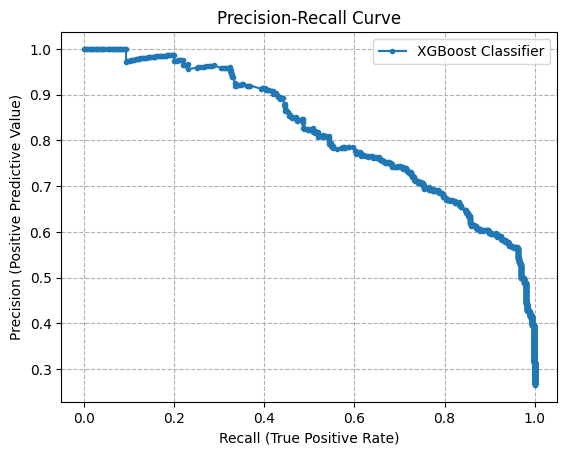

In [38]:
precision, recall, thresholds = precision_recall_curve( y_test,y_scores )
plt.plot(recall, precision, marker='.', label='XGBoost Classifier')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision (Positive Predictive Value)')
plt.title('Precision-Recall Curve')
plt.grid(True, linestyle='--')

plt.legend()



In [39]:
# Define your new optimal threshold
OPTIMAL_THRESHOLD = 0.55

# Convert probability scores (y_scores) into binary predictions (0 or 1)
# 1 if score >= threshold, else 0
y_pred_new = np.where(y_scores >= OPTIMAL_THRESHOLD, 1, 0)
new_recall = recall_score(y_test, y_pred_new)
new_precision = precision_score(y_test, y_pred_new)
new_cm = confusion_matrix(y_test, y_pred_new)
print('f1',f1_score(y_test, y_pred_new))
print('accuracy',accuracy_score(y_test, y_pred_new))
print('AUC',roc_auc_score(y_test,y_scores))


print(f"--- Performance at Threshold {OPTIMAL_THRESHOLD} ---")
print(f"New Recall:    {new_recall:.4f}")
print(f"New Precision: {new_precision:.4f}")
print(f"Confusion Matrix:\n{new_cm}")

f1 0.6270627062706271
accuracy 0.8396025550035486
AUC 0.9231212379549975
--- Performance at Threshold 0.55 ---
New Recall:    0.5080
New Precision: 0.8190
Confusion Matrix:
[[993  42]
 [184 190]]


In [40]:
for i, item in enumerate(Tuned_xg.feature_importances_):
      # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

customerID: 0.01
gender: 0.00
SeniorCitizen: 0.01
Partner: 0.01
Dependents: 0.01
tenure: 0.09
PhoneService: 0.00
MultipleLines: 0.01
InternetService: 0.04
OnlineSecurity: 0.13
OnlineBackup: 0.08
DeviceProtection: 0.04
TechSupport: 0.09
StreamingTV: 0.01
StreamingMovies: 0.02
Contract: 0.22
PaperlessBilling: 0.03
PaymentMethod: 0.02
MonthlyCharges: 0.03
TotalCharges: 0.01
numAdminTickets: 0.02
numTechTickets: 0.12


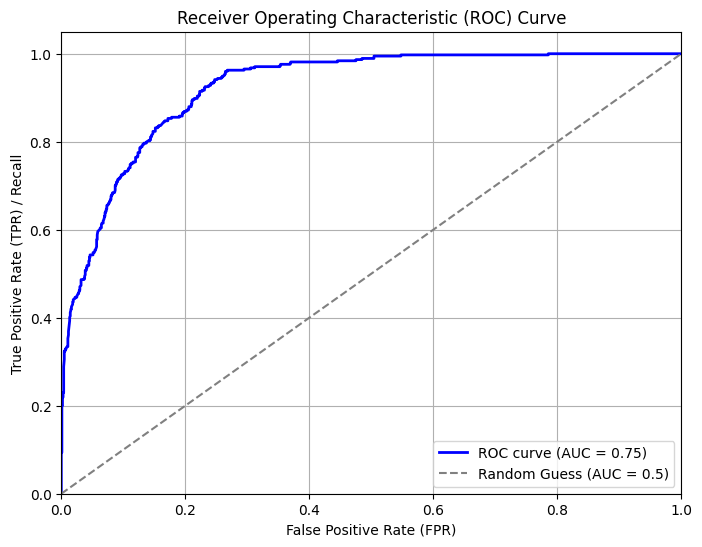

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = 0.75)')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()